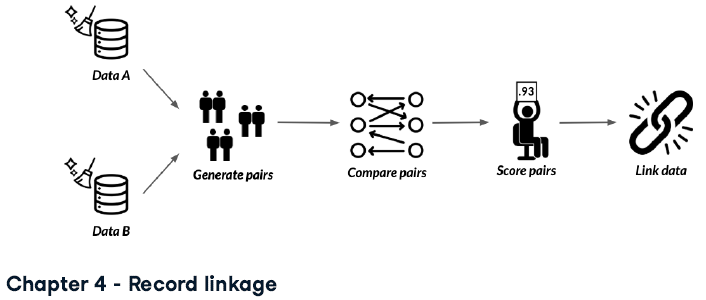

In [ ]:
"""

Record linkage is a powerful technique used to merge multiple datasets together, used when values
have typos or different spellings. In this chapter, you'll learn how to link records by calculating
the similarity between strings—you’ll then use your new skills to join two restaurant review 
datasets into one clean master dataset.


"""

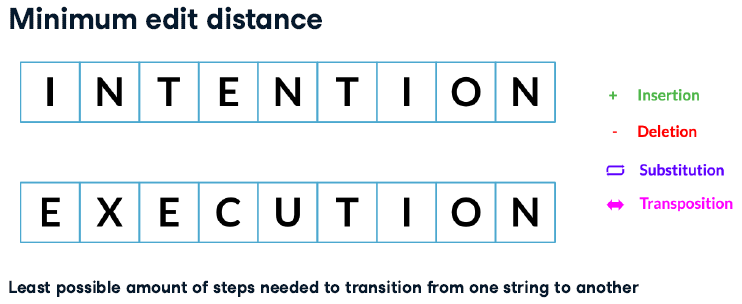

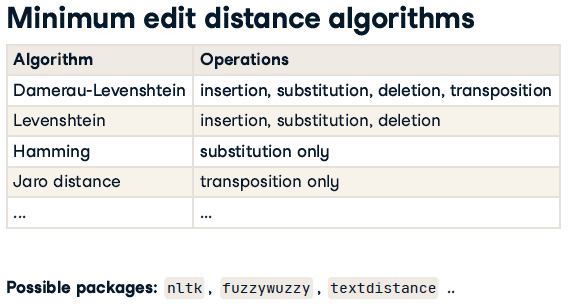

In [16]:
pip install levenshtein

Note: you may need to restart the kernel to use updated packages.



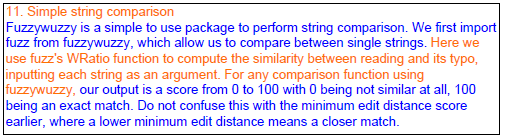

### Simple string comparison

In [12]:
from fuzzywuzzy import fuzz

fuzz.WRatio('Reeding', 'Reading')

86

### Partial strings and different orderings

In [14]:
# Partial string comparison
fuzz.WRatio('Houston Rockets', 'Rockets')

90

In [17]:
# Partial string comparison with different order
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

86

### Comparison with arrays

In [19]:
# Import process
from fuzzywuzzy import process

# Define string and array of possible matches
string = "Houston Rockets vs Los Angeles Lakers"

choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
'Houson vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit = 2)

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

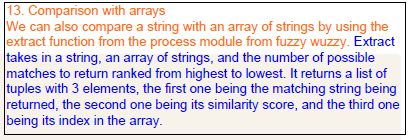

### Collapsing categories with string matching

In [21]:
import pandas as pd

survey = pd.read_csv('./Data/survey.csv', index_col = 0)
print(survey['state'].unique())

['California' 'Cali' 'Calefornia' 'Calefornie' 'Californie' 'Calfornia'
 'Calefernia' 'New York' 'New York City ']


In [29]:
categories = pd.read_csv('./Data/categories_survey.csv', index_col = 0)
print(categories)

        state
0  California
1    New York


### Collapsing all of the state

In [32]:
# For each correct category
for state in categories['state']:
# Find potential matches in states with typoes
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
# For each potential match match
    for potential_match in matches:
# If high similarity score
        if potential_match[1] >= 80:
# Replace typo with correct category
            survey.loc[survey['state'] == potential_match[0], 'state'] = state

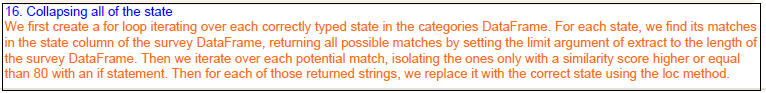

In [31]:
print(survey.head(10))

         state
id            
0   California
1   California
2   California
3   California
4   California
5   California
6   California
7     New York
8     New York
9   California


In [10]:
import pandas as pd
from fuzzywuzzy import process

restaurants = pd.read_csv('./Data/restaurants.csv', index_col = 0)
print(restaurants.head())

                        name                       addr         city  \
0  arnie morton's of chicago   435 s. la cienega blv .   los angeles   
1         art's delicatessen       12224 ventura blvd.   studio city   
2                  campanile       624 s. la brea ave.   los angeles   
3                      fenix    8358 sunset blvd. west     hollywood   
4         grill on the alley           9560 dayton way   los angeles   

        phone      type  
0  3102461501  american  
1  8187621221  american  
2  2139381447  american  
3  2138486677  american  
4  3102760615  american  


### Remapping categories II

In [4]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['type'] == match[0]] = 'italian'

In [6]:
# Inspect the final result
print(restaurants['type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'mexican' 'southwestern'
 'steakhouses' 'southern' 'cajun']


In [9]:
categories = ['italian', 'asian', 'american']

# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'southwestern' 'steakhouses'
 'southern' 'cajun']


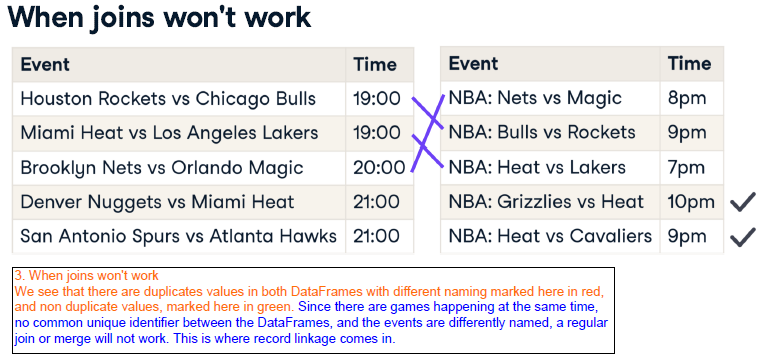

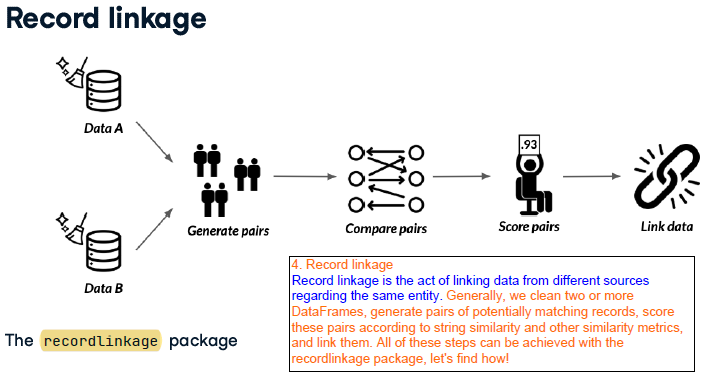

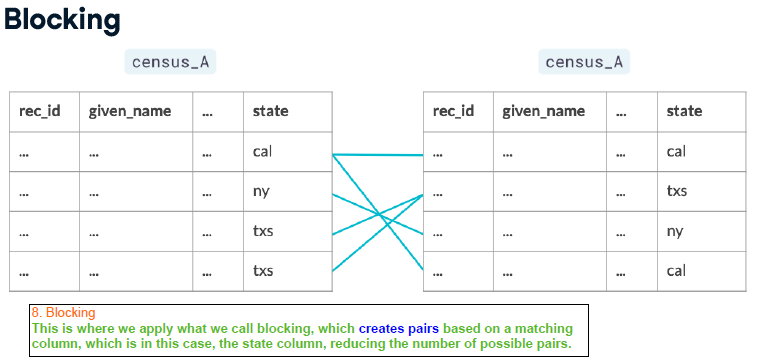

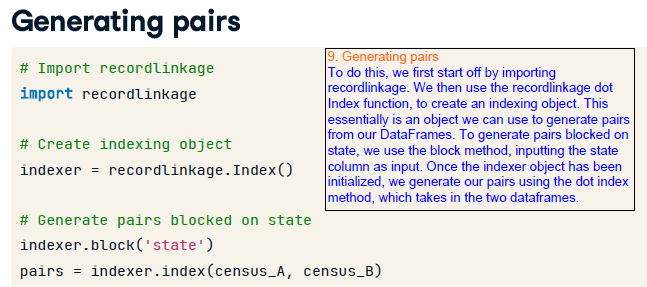

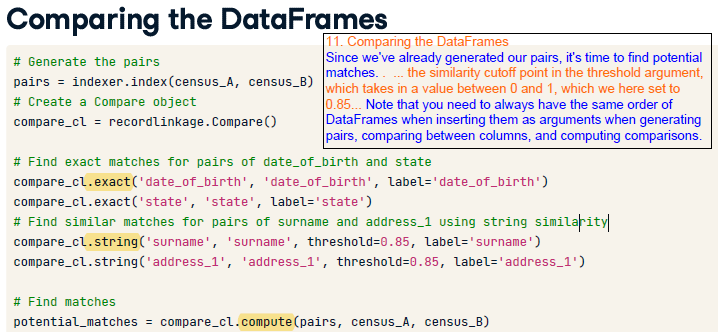

## Linking DataFrames

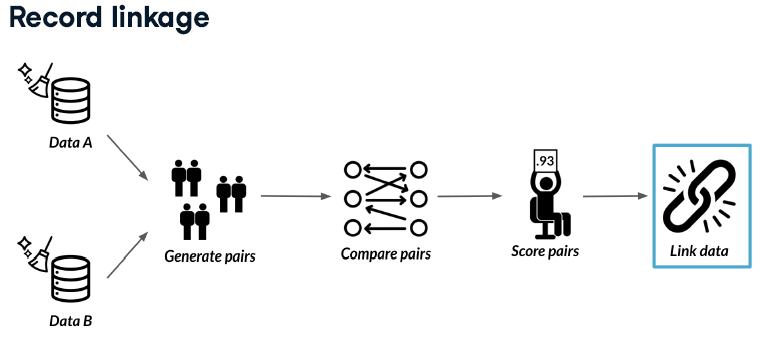

In [ ]:
# Need appropriate data to do this exercise

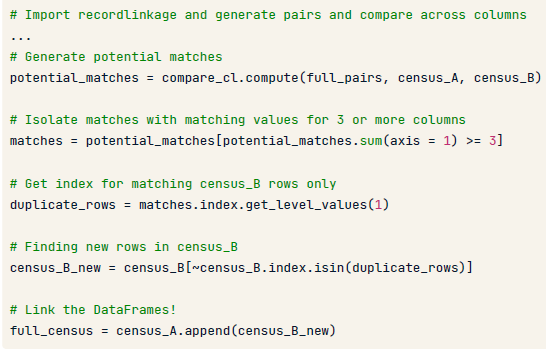